# Self-labeling of Fully Mediating Representations by Graph Alignment

This notebook is made available as supporting material for the paper:
https://openreview.net/forum?id=XEw5Onu69uu

## 1. Download Indigo dataset

In [40]:
file_id ='16nAdDG78fnA3af7tWPhmg5MSjv1h5ZJS'
destination = './indigo_dataset.zip'
download_file_from_google_drive(file_id, destination)

In [23]:
from zipfile import ZipFile
import os 
with ZipFile('indigo_dataset.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
os.mkdir('dataset_indigo') 

## 2. Preprocess Indigo dataset images to correct resolution for ChemGrapher (1000x1000)

In [24]:
!python preprocess/preprocess_indigo_dataset.py --dataset_folder indigo_validation_set_examples/images --output_folder dataset_indigo --num_images 100

## 3. Try predicting SMILES given one image from Indigo dataset using a pretrained ChemGrapher model

Let us first have a look at the input image.
Feel free to change the image filename to test with other images

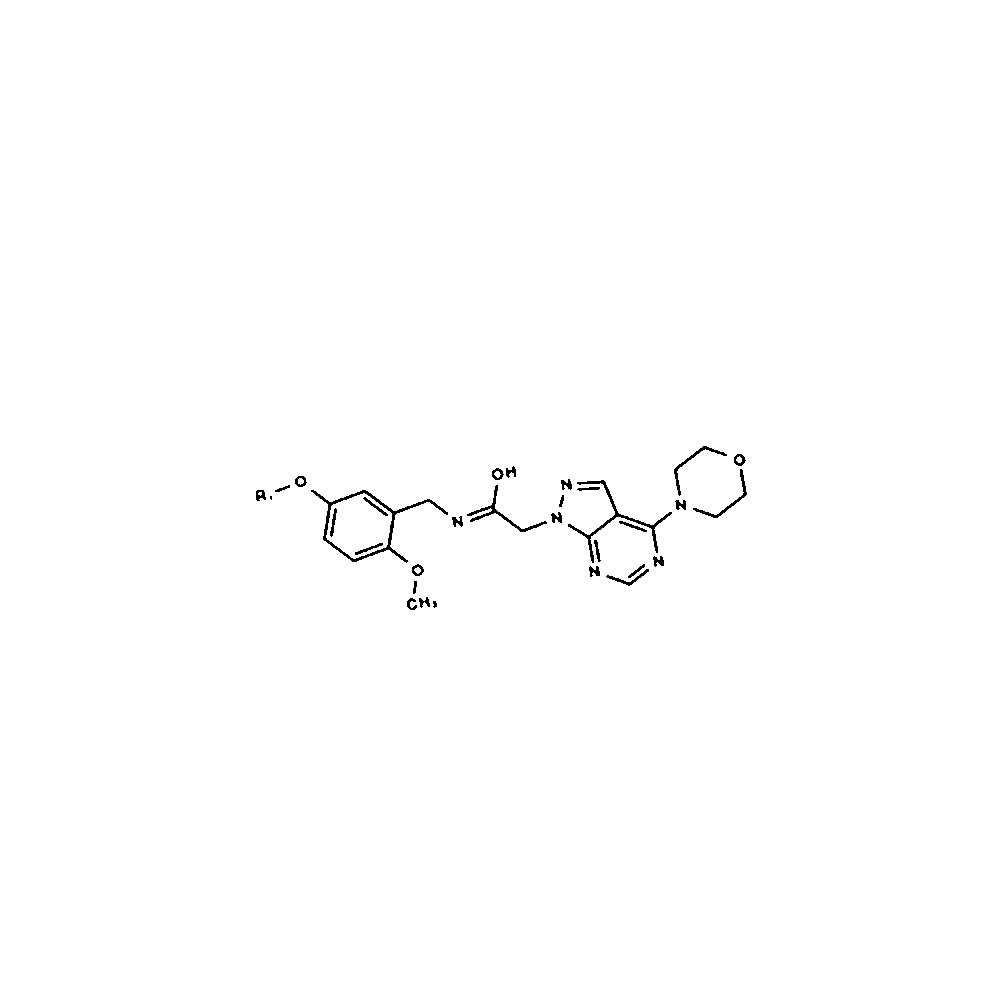

In [27]:
from IPython.display import Image
Image(filename='dataset_indigo/2.png') 

In [38]:
smiles = !python run_scripts/predict_smiles.py --inputfile dataset_indigo/2.png --segnetwork pretrained_models/segmentation/pretrained_segmentation.SAV --clas_bond_network pretrained_models/bond_clas/pretrained_clas_bond.SAV --clas_atom_network pretrained_models/atom_clas/pretrained_clas_atom.SAV --clas_charge_network pretrained_models/charge_clas/pretrained_clas_charge.SAV

Let us see how this predicted molecule looks like:

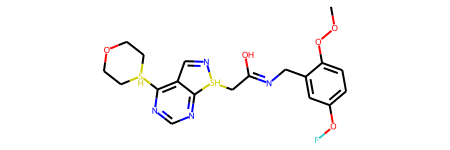

In [39]:
from rdkit import Chem
mol = Chem.MolFromSmiles(smiles[4])
mol

## 4. Predict U->V

The SMILES gives us the resulting graph (W) however without the planar embedding (V). When we have the planar embedding available we know which atom/edge prediction relates to which part in the original input image (U) and with this also where exactly the mistakes are made. So the next step is to use ChemGrapher to predict V given U.